# Road Accident Survival Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d himelsarder/road-accident-survival-dataset

Dataset URL: https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/1.19k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.19k/1.19k [00:00<00:00, 12.8kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile("/home/bhxveshhh/ML/Road Accident Survival Prediction/road-accident-survival-dataset.zip", 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Road Accident Survival Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("accident.csv")

In [26]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [27]:
df.shape

(200, 6)

In [28]:
df.size

1200

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,43.425000,14.941910,18.0,31.0,43.5,56.0,69.0
Speed_of_Impact,197.0,70.441624,30.125298,20.0,43.0,71.0,95.0,119.0
Survived,200.0,0.505000,0.501230,0.0,0.0,1.0,1.0,1.0


In [31]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.nunique()

Age                51
Gender              2
Speed_of_Impact    80
Helmet_Used         2
Seatbelt_Used       2
Survived            2
dtype: int64

In [34]:
df['Survived'].value_counts()

Survived
1    101
0     99
Name: count, dtype: int64

## Data Visualization

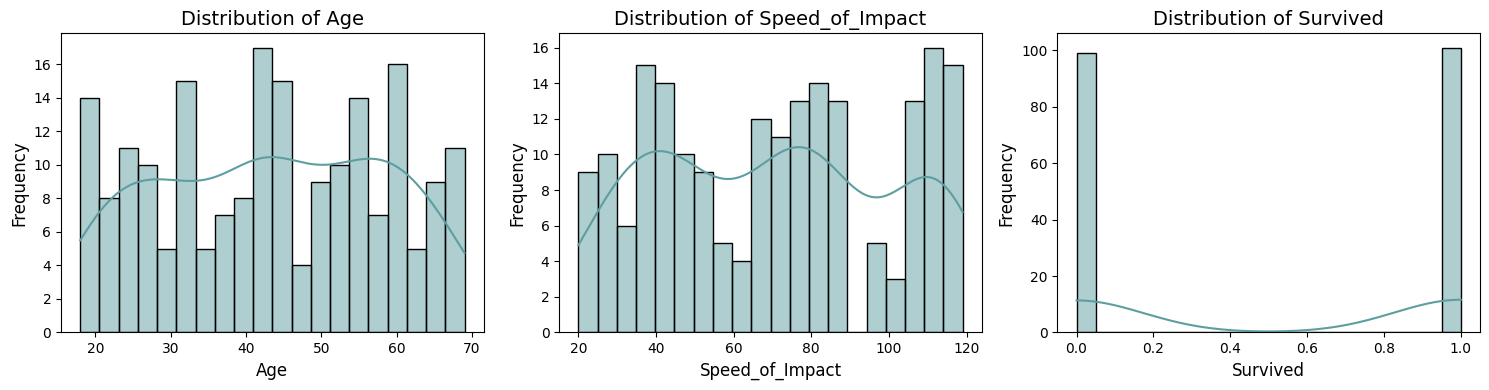

In [35]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

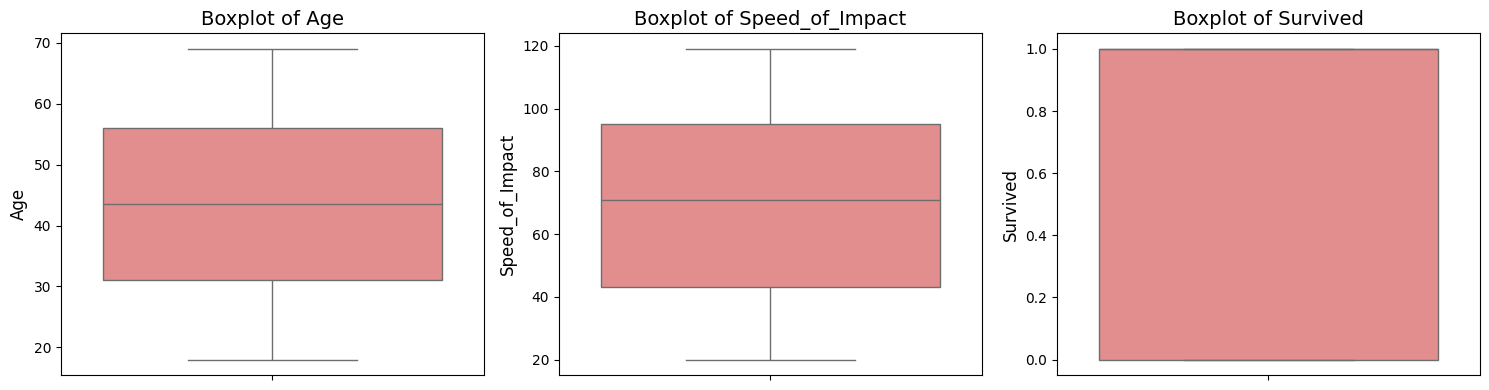

In [36]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

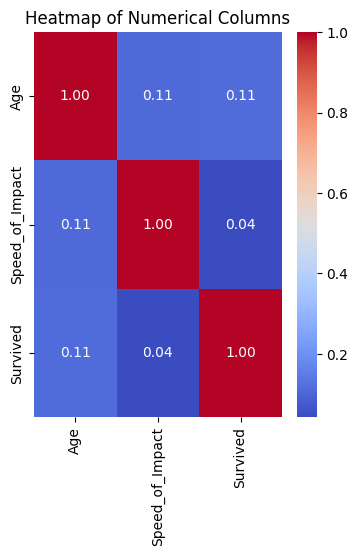

In [37]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(4, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [38]:
# filling null values with mean for numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [39]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [40]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [41]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Training

In [44]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [46]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.575, 0.575, 0.475, 0.55, 0.45, 0.525, 0.55, 0.5, 0.45]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65        22
           1       0.54      0.39      0.45        18

    accuracy                           0.57        40
   macro avg       0.57      0.56      0.55        40
weighted avg       0.57      0.57      0.56        40

Confusion Matrix:
 [[16  6]
 [11  7]]


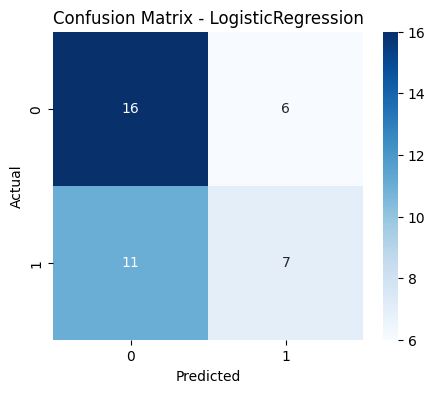

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65        22
           1       0.54      0.39      0.45        18

    accuracy                           0.57        40
   macro avg       0.57      0.56      0.55        40
weighted avg       0.57      0.57      0.56        40

Confusion Matrix:
 [[16  6]
 [11  7]]


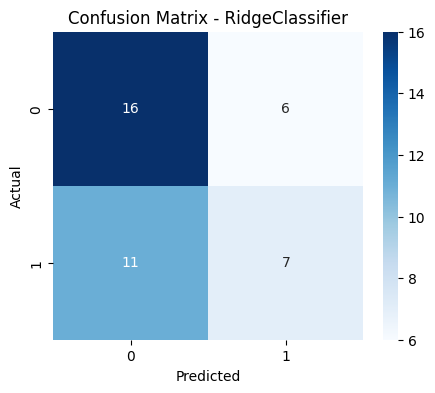

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51        22
           1       0.42      0.44      0.43        18

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.48      0.47      0.48        40

Confusion Matrix:
 [[11 11]
 [10  8]]


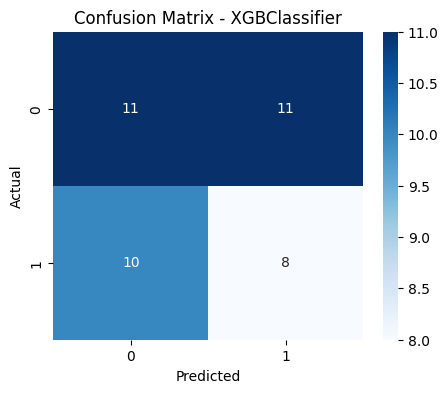

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        22
           1       0.50      0.56      0.53        18

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

Confusion Matrix:
 [[12 10]
 [ 8 10]]


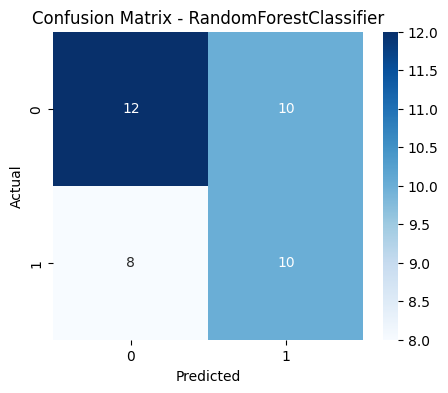

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.30      0.17      0.21        18

    accuracy                           0.45        40
   macro avg       0.40      0.42      0.40        40
weighted avg       0.41      0.45      0.41        40

Confusion Matrix:
 [[15  7]
 [15  3]]


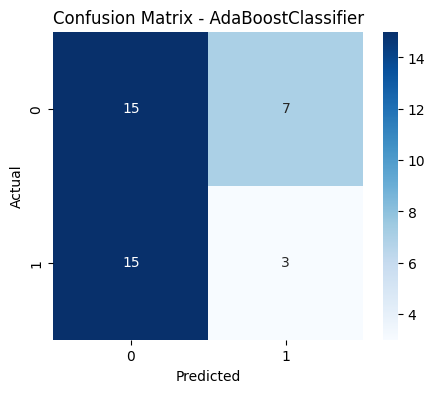

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        22
           1       0.48      0.56      0.51        18

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.53        40

Confusion Matrix:
 [[11 11]
 [ 8 10]]


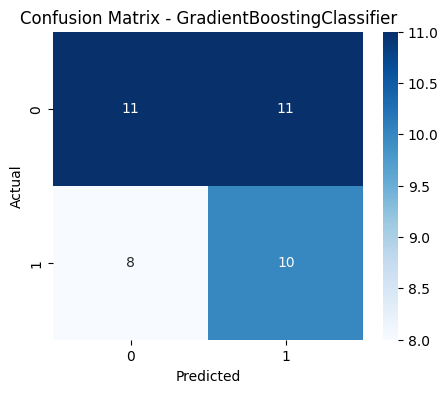

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53        22
           1       0.41      0.39      0.40        18

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40

Confusion Matrix:
 [[12 10]
 [11  7]]


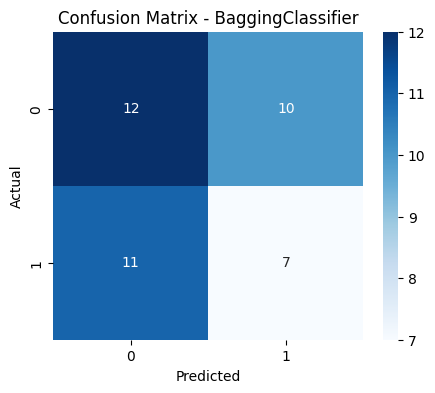

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.41      0.46        22
           1       0.43      0.56      0.49        18

    accuracy                           0.47        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.49      0.47      0.47        40

Confusion Matrix:
 [[ 9 13]
 [ 8 10]]


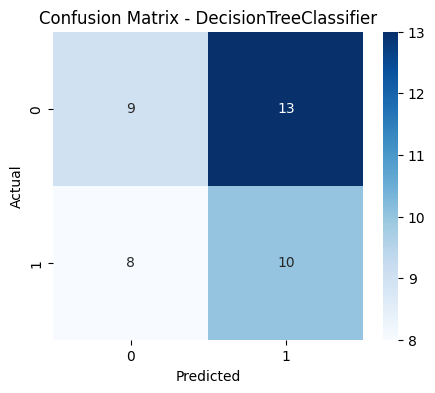

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56        22
           1       0.33      0.22      0.27        18

    accuracy                           0.45        40
   macro avg       0.42      0.43      0.41        40
weighted avg       0.42      0.45      0.43        40

Confusion Matrix:
 [[14  8]
 [14  4]]


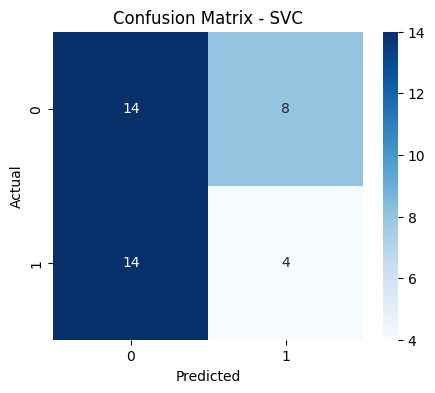

In [47]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()